<a href="https://colab.research.google.com/github/dn-bit/CNN_first_model/blob/main/cnn_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
#reading tensorflow in-build datatset


(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
#Firstly we need to convert images into 0-1 so that we divided into the 255

train_images, test_images = train_images/255, test_images/255

In [ ]:
#As we seen here all value converted into between 0 to 1

train_images[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

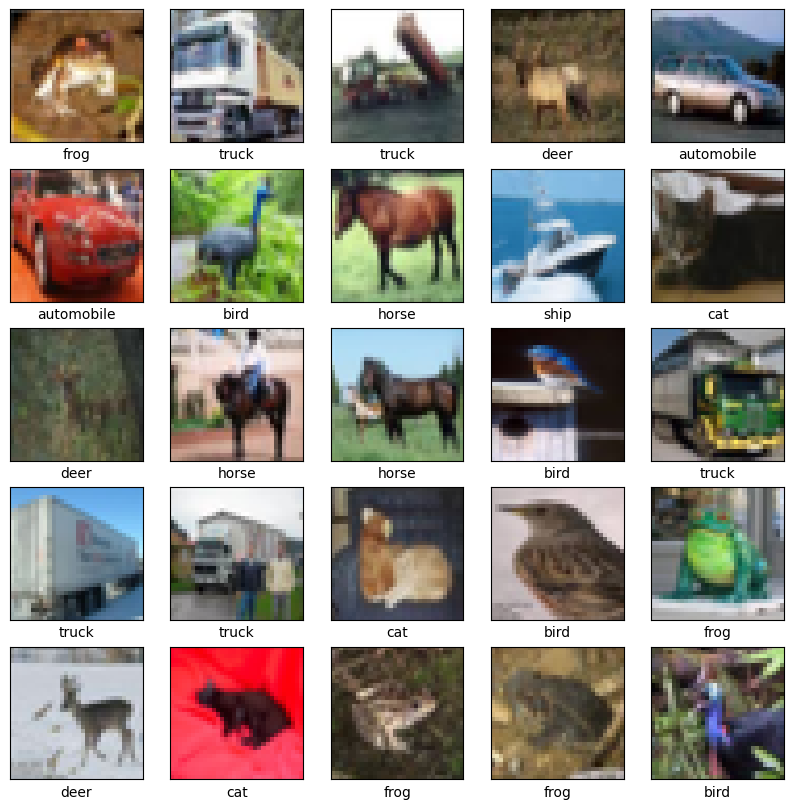

In [ ]:
# if we want to see first 25 images of train images , as following
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()


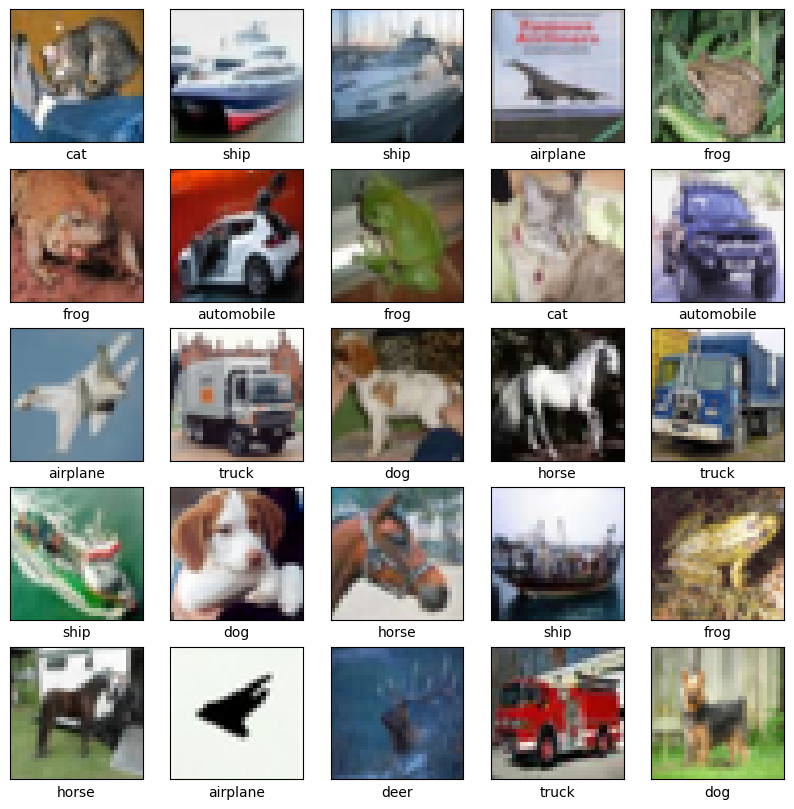

In [ ]:
# Test image first 25 images


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i][0]])

plt.show()


In [ ]:
# so here we describe our model and adding convolution and maxpooling layers



model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [ ]:
# Now we adding Flatten layer and Dense layer or say hidden layer

model.add(layers.Flatten())
model.add(layers.Dense((64),activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# we can see model summary as below

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
# if we want to add early stopping ,  i'm not sure about baseline

#ear_stopping=tf.keras.callbacks.EarlyStopping(patience=5,baseline='val_accuracy',verbose=1)

In [ ]:
from keras.api._v2.keras import metrics
# Now we compile our model

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#we tried with 10 epoche if we do with more epoch or with early stopping then get more accuracy

history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.6709 - accuracy: 0.7627 - val_loss: 0.8471 - val_accuracy: 0.7059
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6306 - accuracy: 0.7769 - val_loss: 0.8959 - val_accuracy: 0.7066
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6016 - accuracy: 0.7869 - val_loss: 0.8560 - val_accuracy: 0.7144
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.5690 - accuracy: 0.7988 - val_loss: 0.8783 - val_accuracy: 0.7170
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5380 - accuracy: 0.8095 - val_loss: 0.9242 - val_accuracy: 0.7061
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.5054 - accuracy: 0.8214 - val_loss: 0.9399 - val_accuracy: 0.7038
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.4820 - accuracy: 0.8279 - val_loss: 0.9462 -

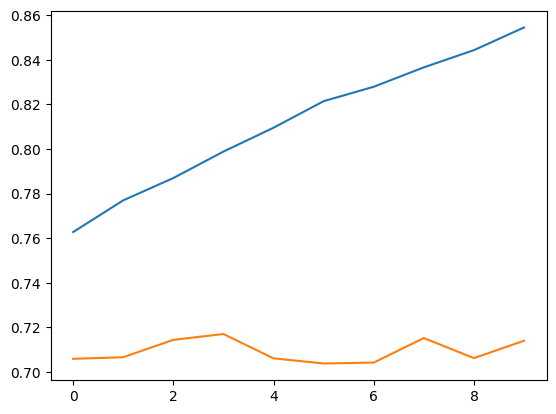

In [ ]:
# we also plotting training accuracy vs val_accuracy how it's flow going
import seaborn as sns
sns.lineplot(history.history["accuracy"])
sns.lineplot(history.history["val_accuracy"])
plt.show()

In [ ]:
# Finally here we get test_loss and test_accuracy of our model

test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 5s - loss: 1.0276 - accuracy: 0.7140 - 5s/epoch - 17ms/step
